In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import folium

In [3]:
for i in range(6):
    print('../data/bike_rent_{}.csv'.format(i+1))

../data/bike_rent_1.csv
../data/bike_rent_2.csv
../data/bike_rent_3.csv
../data/bike_rent_4.csv
../data/bike_rent_5.csv
../data/bike_rent_6.csv


In [4]:
bikes_temp = {}
for i in range(6):
    bikes_temp[i] = pd.read_csv('../data/bike_rent_{}.csv'.format(i+1), encoding='cp949', parse_dates=['대여일시'])

In [5]:
bikes_temp

{0:             자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리
 0       SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330
 1       SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180
 2       SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930
 3       SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340
 4       SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230
 ...           ...                 ...       ...                ...   ...   ...
 399994  SPB-16680 2019-06-28 17:14:00       316         종각역 1번출구 앞    16  2360
 399995  SPB-07874 2019-06-28 16:59:00       345         서울보증보험본사 앞    32  1880
 399996  SPB-21622 2019-06-28 16:44:00       526           용답토속공원 앞    64  6100
 399997  SPB-20056 2019-06-28 17:46:00       453  종로오가 지하쇼핑센터 14번출구     7   880
 399998  SPB-18692 2019-06-28 17:34:00       345         서울보증보험본사 앞    35  1820
 
 [399999 rows x 6 columns],
 1:    

In [6]:
# 일부파일 확인
bikes_temp[5].head()

자전거번호                대여일시  대여 대여소번호      대여 대여소명  이용시간  이용거리
0  SPB-21524 2019-06-20 08:44:00      2202  청계산입구역 1번출구     8   790
1  SPB-08966 2019-06-20 18:00:00      2202  청계산입구역 1번출구     5  1470
2  SPB-09048 2019-06-20 17:56:00      2202  청계산입구역 1번출구     9  1820
3  SPB-05661 2019-06-20 20:40:00      2202  청계산입구역 1번출구     6  1490
4  SPB-05353 2019-06-20 20:41:00      2202  청계산입구역 1번출구     8  1480

In [7]:
bikes = pd.concat(bikes_temp, axis='index', ignore_index=True)
bikes.head() #앞부분 5개
bikes.tail() #뒷부분 5개


자전거번호                대여일시  대여 대여소번호     대여 대여소명  이용시간  이용거리
2215627  SPB-22438 2019-06-24 07:40:00       240  문래역 4번출구 앞    13   900
2215628  SPB-24455 2019-06-25 07:34:00       240  문래역 4번출구 앞     6   880
2215629  SPB-24557 2019-06-26 08:19:00       240  문래역 4번출구 앞     7   930
2215630  SPB-00649 2019-06-27 07:38:00       240  문래역 4번출구 앞    11  1030
2215631  SPB-14209 2019-06-28 07:37:00       240  문래역 4번출구 앞     6  1010

In [8]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   이용시간      int64         
 5   이용거리      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 101.4+ MB


In [9]:
bikes.shape

(2215632, 6)

In [10]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '이용시간', '이용거리'], dtype='object')

In [11]:
bikes.describe()

대여일시      대여 대여소번호          이용시간          이용거리
count                        2215632  2.215632e+06  2.215632e+06  2.215632e+06
mean   2019-06-16 08:40:01.500303872  1.226154e+03  2.716998e+01  3.912916e+03
min              2019-06-01 00:00:00  3.000000e+00  1.000000e+00  0.000000e+00
25%              2019-06-08 22:04:00  5.050000e+02  8.000000e+00  1.220000e+03
50%              2019-06-16 15:13:00  1.159000e+03  1.700000e+01  2.270000e+03
75%              2019-06-23 20:22:00  1.846000e+03  3.700000e+01  4.670000e+03
max              2019-06-30 23:59:00  9.998000e+03  3.133000e+03  2.323100e+05
std                              NaN  8.499197e+02  2.908119e+01  5.145471e+03

In [12]:
pd.options.display.float_format='{:2f}'.format 
#위에거 정수로 바꾸는방법

In [13]:
bikes.describe()

대여일시       대여 대여소번호           이용시간  \
count                        2215632 2215632.000000 2215632.000000   
mean   2019-06-16 08:40:01.500303872    1226.154183      27.169981   
min              2019-06-01 00:00:00       3.000000       1.000000   
25%              2019-06-08 22:04:00     505.000000       8.000000   
50%              2019-06-16 15:13:00    1159.000000      17.000000   
75%              2019-06-23 20:22:00    1846.000000      37.000000   
max              2019-06-30 23:59:00    9998.000000    3133.000000   
std                              NaN     849.919678      29.081187   

                이용거리  
count 2215632.000000  
mean     3912.916414  
min         0.000000  
25%      1220.000000  
50%      2270.000000  
75%      4670.000000  
max    232310.000000  
std      5145.471002

In [14]:
bikes.isnull()

자전거번호   대여일시  대여 대여소번호  대여 대여소명   이용시간   이용거리
0        False  False     False    False  False  False
1        False  False     False    False  False  False
2        False  False     False    False  False  False
3        False  False     False    False  False  False
4        False  False     False    False  False  False
...        ...    ...       ...      ...    ...    ...
2215627  False  False     False    False  False  False
2215628  False  False     False    False  False  False
2215629  False  False     False    False  False  False
2215630  False  False     False    False  False  False
2215631  False  False     False    False  False  False

[2215632 rows x 6 columns]

In [15]:
bikes.isnull().sum()
#누락 값 더하기 0 이면 누락이 없다.!

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
이용시간        0
이용거리        0
dtype: int64

In [16]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   이용시간      int64         
 5   이용거리      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 101.4+ MB


In [17]:
bikes.head()

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930
3  SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340
4  SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230

In [18]:
bikes['대여일시']

0         2019-06-03 08:49:00
1         2019-06-03 08:33:00
2         2019-06-05 08:27:00
3         2019-06-05 08:46:00
4         2019-06-10 08:27:00
                  ...        
2215627   2019-06-24 07:40:00
2215628   2019-06-25 07:34:00
2215629   2019-06-26 08:19:00
2215630   2019-06-27 07:38:00
2215631   2019-06-28 07:37:00
Name: 대여일시, Length: 2215632, dtype: datetime64[ns]

In [19]:
bikes['대여일시'].dt.day

0           3
1           3
2           5
3           5
4          10
           ..
2215627    24
2215628    25
2215629    26
2215630    27
2215631    28
Name: 대여일시, Length: 2215632, dtype: int32

In [20]:
bikes['일자'] = bikes['대여일시'].dt.day
bikes.head(50)


자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간   이용거리  \
0   SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27   1330   
1   SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54   1180   
2   SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12   1930   
3   SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6   1340   
4   SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5   1230   
5   SPB-13926 2019-06-11 08:29:00       646  장한평역 1번출구 (국민은행앞)     7   1360   
6   SPB-14638 2019-06-12 08:29:00       646  장한평역 1번출구 (국민은행앞)     5   1340   
7   SPB-18588 2019-06-17 08:34:00       646  장한평역 1번출구 (국민은행앞)     8   1360   
8   SPB-21148 2019-06-17 08:47:00       646  장한평역 1번출구 (국민은행앞)    22   1330   
9   SPB-24533 2019-06-18 08:36:00       646  장한평역 1번출구 (국민은행앞)     6   1230   
10  SPB-24350 2019-06-18 08:46:00       646  장한평역 1번출구 (국민은행앞)    11   1200   
11  SPB-22669 2019-06-19 08:51:00       646  장한평역 1번출구 (국민은행앞)    16   1340   
12  SPB-16560 2019-06-20 08:36:00       646  장한평역 1번출구 (국민은행앞)     6   1370   
13  SPB-03652 2019-06-21 08:34:00       529       장한평역 8번 출구 앞     6   1260   
14  SPB-20807 2019-06-21 08:45:00       646  장한평역 1번출구 (국민은행앞)    20   1350   
15  SPB-24732 2019-06-24 08:33:00       646  장한평역 1번출구 (국민은행앞)     8   1280   
16  SPB-22965 2019-06-25 08:45:00       529       장한평역 8번 출구 앞    26   1180   
17  SPB-21241 2019-06-26 08:32:00       646  장한평역 1번출구 (국민은행앞)     7   1160   
18  SPB-24189 2019-06-27 08:35:00       646  장한평역 1번출구 (국민은행앞)     6   1250   
19  SPB-13936 2019-06-27 08:47:00       529       장한평역 8번 출구 앞    47   1220   
20  SPB-22897 2019-06-28 08:44:00       646  장한평역 1번출구 (국민은행앞)    19   1180   
21  SPB-20167 2019-06-04 08:24:00       911    은평평화공원(역촌역4번출구)    21   5080   
22  SPB-05360 2019-06-12 11:49:00       420     서울시 공공자전거 상암센터    32   1600   
23  SPB-23160 2019-06-16 07:27:00       704        남부법원검찰청 교차로    31   6700   
24  SPB-24696 2019-06-21 08:23:00       911    은평평화공원(역촌역4번출구)    32   5740   
25  SPB-23083 2019-06-24 07:11:00       704        남부법원검찰청 교차로    29   6570   
26  SPB-17268 2019-06-24 11:20:00       418     월드컵경기장역 3번출구 옆     6   1040   
27  SPB-23516 2019-06-25 08:32:00       418     월드컵경기장역 3번출구 옆     8    840   
28  SPB-03623 2019-06-26 08:32:00       418     월드컵경기장역 3번출구 옆     4    910   
29  SPB-24410 2019-06-19 13:49:00       954        은평뉴타운구파발9단지     5    570   
30  SPB-24510 2019-06-20 08:01:00       969           은평 지웰테라스     8   1780   
31  SPB-11658 2019-06-20 10:47:00       942          상림마을 생태공원     8   1400   
32  SPB-20336 2019-06-29 21:05:00       207       여의나루역 1번출구 앞    48  12560   
33  SPB-16935 2019-06-29 23:18:00       259            대방역6번출구     7   1590   
34  SPB-24672 2019-06-29 23:10:00       207       여의나루역 1번출구 앞    54   7940   
35  SPB-08892 2019-06-01 00:03:00       129    신촌역(2호선) 6번출구 옆    25   3250   
36  SPB-11921 2019-06-01 00:03:00       129    신촌역(2호선) 6번출구 옆    27   3310   
37  SPB-16828 2019-06-01 01:29:00       372         약수역 3번출구 뒤    56  16520   
38  SPB-15002 2019-06-01 03:49:00       151           망원1동주민센터     4    940   
39  SPB-10340 2019-06-01 06:08:00       103         망원역 2번출구 앞     4    870   
40  SPB-13118 2019-06-01 09:01:00       152         마포구민체육센터 앞     7   1190   
41  SPB-15780 2019-06-01 11:28:00       107    신한은행 서교동금융센터점 앞    10   1780   
42  SPB-07886 2019-06-01 11:21:00       182         망원2빗물펌프장 앞    43   1630   
43  SPB-22571 2019-06-01 10:59:00       101        (구)합정동 주민센터    95    380   
44  SPB-01121 2019-06-01 13:02:00       107    신한은행 서교동금융센터점 앞    48   2500   
45  SPB-20049 2019-06-01 13:52:00      3106          홍남교 두바퀴쉼터    25   6010   
46  SPB-22571 2019-06-01 12:38:00       101        (구)합정동 주민센터   106   1540   
47  SPB-06919 2019-06-01 14:35:00       102         망원역 1번출구 앞    57   1720   
48  SPB-05466 2019-06-01 16:06:00       104         합정역 1번출구 앞    10   1440   
49  SPB-22571 2019-06-01 14:29:00       101        (구)합정동 

In [21]:
bikes['대여시간대'] = bikes['대여일시'].dt.hour
bikes.head(10)


자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   
3  SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340   5   
4  SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230  10   
5  SPB-13926 2019-06-11 08:29:00       646  장한평역 1번출구 (국민은행앞)     7  1360  11   
6  SPB-14638 2019-06-12 08:29:00       646  장한평역 1번출구 (국민은행앞)     5  1340  12   
7  SPB-18588 2019-06-17 08:34:00       646  장한평역 1번출구 (국민은행앞)     8  1360  17   
8  SPB-21148 2019-06-17 08:47:00       646  장한평역 1번출구 (국민은행앞)    22  1330  17   
9  SPB-24533 2019-06-18 08:36:00       646  장한평역 1번출구 (국민은행앞)     6  1230  18   

   대여시간대  
0      8  
1      8  
2      8  
3      8  
4      8  
5      8  
6      8  
7      8  
8      8  
9      8

In [22]:
bikes['대여일시'].dt.dayofweek

0          0
1          0
2          2
3          2
4          0
          ..
2215627    0
2215628    1
2215629    2
2215630    3
2215631    4
Name: 대여일시, Length: 2215632, dtype: int32

In [23]:
# 요일추가를 람다 활용하기
요일= ["월", "화", "수", "목", "금", "토", "일"]

bikes['요일'] = bikes['대여일시'].dt.dayofweek.apply(lambda x : 요일[x])
bikes

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  \
0        SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27   
1        SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54   
2        SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12   
3        SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6   
4        SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5   
...            ...                 ...       ...                ...   ...   
2215627  SPB-22438 2019-06-24 07:40:00       240         문래역 4번출구 앞    13   
2215628  SPB-24455 2019-06-25 07:34:00       240         문래역 4번출구 앞     6   
2215629  SPB-24557 2019-06-26 08:19:00       240         문래역 4번출구 앞     7   
2215630  SPB-00649 2019-06-27 07:38:00       240         문래역 4번출구 앞    11   
2215631  SPB-14209 2019-06-28 07:37:00       240         문래역 4번출구 앞     6   

         이용거리  일자  대여시간대 요일  
0        1330   3      8  월  
1        1180   3      8  월  
2        1930   5      8  수  
3        1340   5      8  수  
4        1230  10      8  월  
...       ...  ..    ... ..  
2215627   900  24      7  월  
2215628   880  25      7  화  
2215629   930  26      8  수  
2215630  1030  27      7  목  
2215631  1010  28      7  금  

[2215632 rows x 9 columns]

In [24]:
bikes['주말구분'] = bikes['대여일시'].dt.dayofweek.apply(lambda x : '평일' if x <5 else "주말")
bikes.head(2)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   

   대여시간대 요일 주말구분  
0      8  월   평일  
1      8  월   평일

In [25]:

#bikes['이용시간'] = bikes['이용시간'].dt.dayofweek.apply(lambda x : x/60)
#bikes

In [26]:
# 대여소점 파일 프레임화 하기

bike_shop = pd.read_csv('../data/bike_shop.csv', encoding='cp949')

In [27]:
bike_shop.head()

구분  대여소번호              대여소명        위도         경도  거치대수
0  마포구    101  101. (구)합정동 주민센터 37.549561 126.905754     5
1  마포구    102   102. 망원역 1번출구 앞 37.556000 126.910454    20
2  마포구    103   103. 망원역 2번출구 앞 37.554951 126.910835    14
3  마포구    104   104. 합정역 1번출구 앞 37.550629 126.914986    13
4  마포구    105   105. 합정역 5번출구 앞 37.550007 126.914825     5

In [28]:
bike_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      1537 non-null   object 
 1   대여소번호   1537 non-null   int64  
 2   대여소명    1537 non-null   object 
 3   위도      1537 non-null   float64
 4   경도      1537 non-null   float64
 5   거치대수    1537 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 72.2+ KB


In [29]:
bike_gu = bike_shop[['구분','대여소번호','위도','경도']]
bike_gu.head()

구분  대여소번호        위도         경도
0  마포구    101 37.549561 126.905754
1  마포구    102 37.556000 126.910454
2  마포구    103 37.554951 126.910835
3  마포구    104 37.550629 126.914986
4  마포구    105 37.550007 126.914825

In [30]:
bikes = pd.merge(bikes,bike_gu, left_on='대여 대여소번호', right_on='대여소번호')
bikes.head(1)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   

   대여시간대 요일 주말구분    구분  대여소번호        위도         경도  
0      8  월   평일  동대문구    646 37.561867 127.064377

In [31]:
bikes.drop(['대여소번호'], axis='columns', inplace=True)

In [32]:
bikes.head(2)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   

   대여시간대 요일 주말구분    구분        위도         경도  
0      8  월   평일  동대문구 37.561867 127.064377  
1      8  월   평일   성동구 37.563511 127.056725

In [33]:
bikes.rename(columns={'구분':'대여구','위도':'대여점위도','경도':'대여점경도'}, inplace=True)
bikes.head()

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   
3  SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340   5   
4  SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230  10   

   대여시간대 요일 주말구분   대여구     대여점위도      대여점경도  
0      8  월   평일  동대문구 37.561867 127.064377  
1      8  월   평일   성동구 37.563511 127.056725  
2      8  수   평일  동대문구 37.561867 127.064377  
3      8  수   평일  동대문구 37.561867 127.064377  
4      8  월   평일   성동구 37.561371 127.063660

In [34]:
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
이용시간        0
이용거리        0
일자          0
대여시간대       0
요일          0
주말구분        0
대여구         0
대여점위도       0
대여점경도       0
dtype: int64

In [35]:
bikes.head(2)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   

   대여시간대 요일 주말구분   대여구     대여점위도      대여점경도  
0      8  월   평일  동대문구 37.561867 127.064377  
1      8  월   평일   성동구 37.563511 127.056725

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
#폰트 경로
font_path = "/usr/share/fonts/truetype/NanumFont/NanumGothicBold.ttf"
 
#폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()
 
plt.rcParams["font.family"] = font_name
plt.rcParams["font.size"] = 15

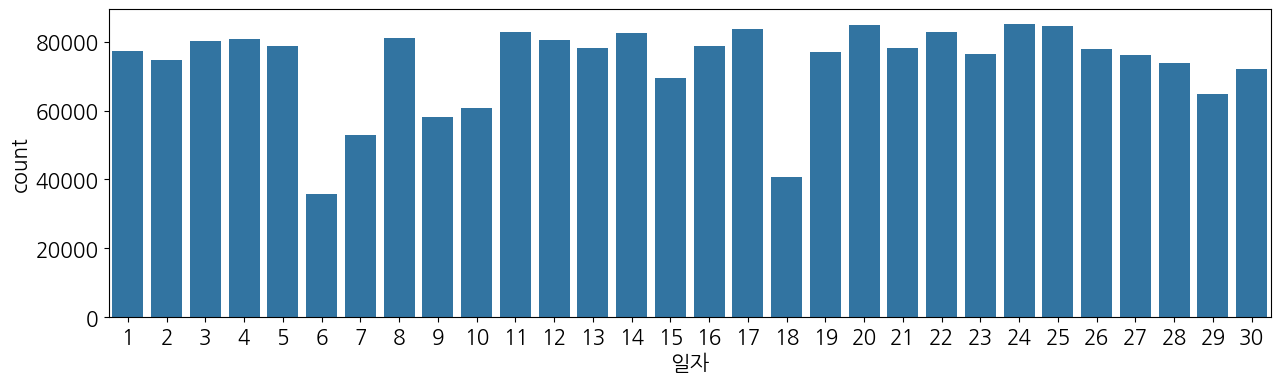

In [37]:
# 일자별 따릉이 이용건수
plt.figure(figsize=(15,4))
sns.countplot(x='일자', data=bikes);

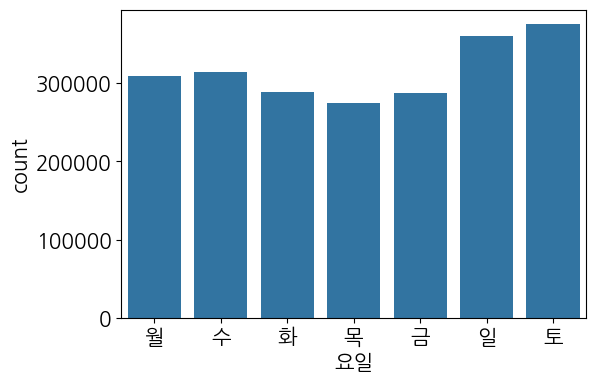

In [38]:
#요일별 따릉이 이용건수
plt.figure(figsize=(6,4))
sns.countplot(x='요일', data=bikes);

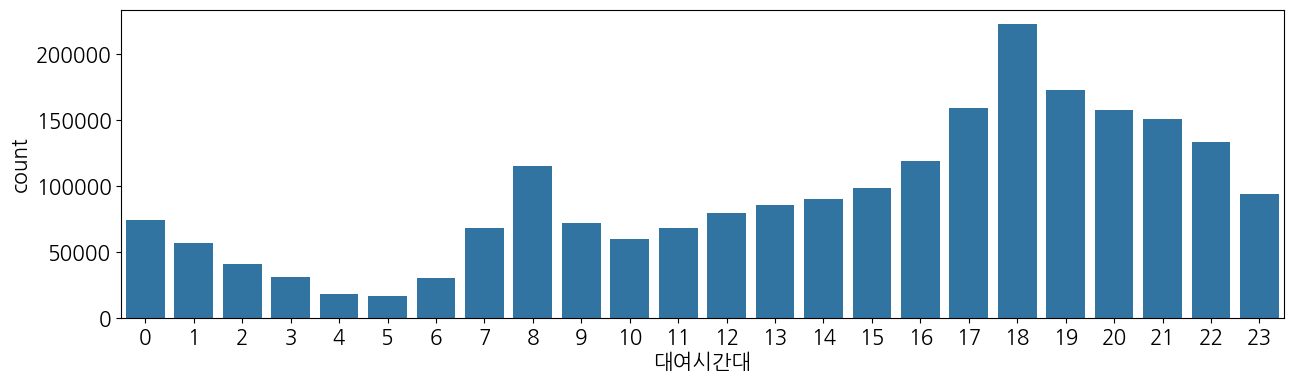

In [39]:
#대여시간
plt.figure(figsize=(15,4))
sns.countplot(x='대여시간대', data=bikes);

In [40]:
# 두가지 요인을 위해 피봇 테이블 생성
bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')

요일         금      목      수      월      일      토      화
대여시간대                                                 
0       8353   9568   8624   7461  17025  13438   9907
1       6748   7508   7226   4846  11731  11232   7529
2       4762   5857   5328   3305   8804   8348   4497
3       3045   3992   3430   2102   8748   6221   3157
4       1979   2402   2160   1544   4076   3584   1971
5       2070   2451   2495   2069   2567   2619   2316
6       4252   4534   5393   4455   3311   3345   4633
7      10337  11324  13853  11418   4420   4869  12070
8      17164  17867  23542  18762   6651   8696  22119
9       8901  10833  11515  10017   8530  10357  11369
10      6232   8164   8006   7384  10215  11377   7924
11      7022   9269   9241   8400  11974  13452   8787
12      8257  10597  10124   9848  14728  15822  10035
13      9585  11024  10269   9868  17102  17854   9984
14     10792  10747  10523  10182  18937  19218   9659
15     12168   9543  11846  11495  21866  21775   9248
16     15522  12278  14861  14450  24692  24452  12638
17     22978  17855  21181  22498  26392  27365  20799
18     32900  28806  34606  38635  27452  25958  33922
19     22261  19608  24924  28746  28142  26883  22275
20     19684  17643  21835  25413  27068  27082  18615
21     19760  17189  21265  23303  23656  27143  17910
22     19201  15077  19240  20211  18648  24407  16319
23     13083  10678  12568  13174  13367  19539  11017

In [41]:
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')
hourly_dayofweek_ride.head()

요일        금     목     수     월      일      토     화
대여시간대                                            
0      8353  9568  8624  7461  17025  13438  9907
1      6748  7508  7226  4846  11731  11232  7529
2      4762  5857  5328  3305   8804   8348  4497
3      3045  3992  3430  2102   8748   6221  3157
4      1979  2402  2160  1544   4076   3584  1971

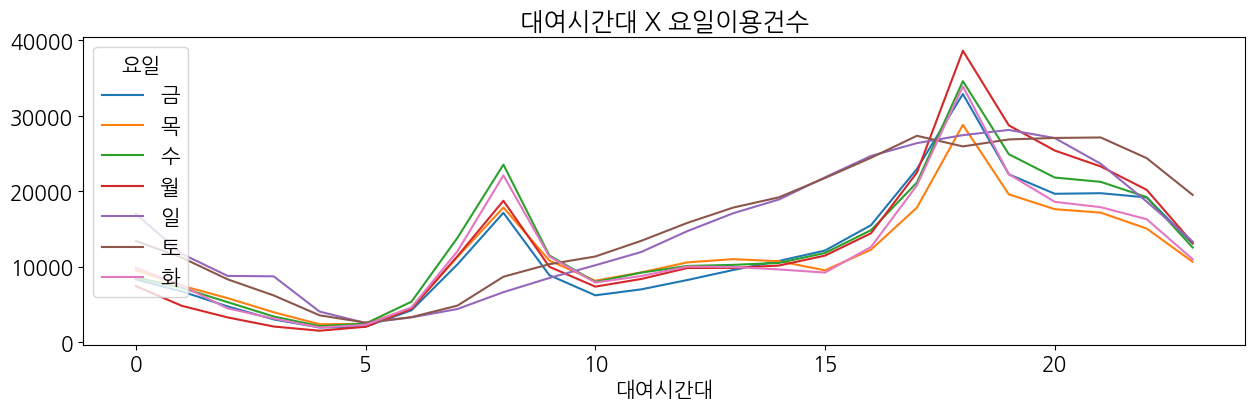

In [42]:
hourly_dayofweek_ride.plot(kind='line', title='대여시간대 X 요일이용건수', figsize=(15,4));

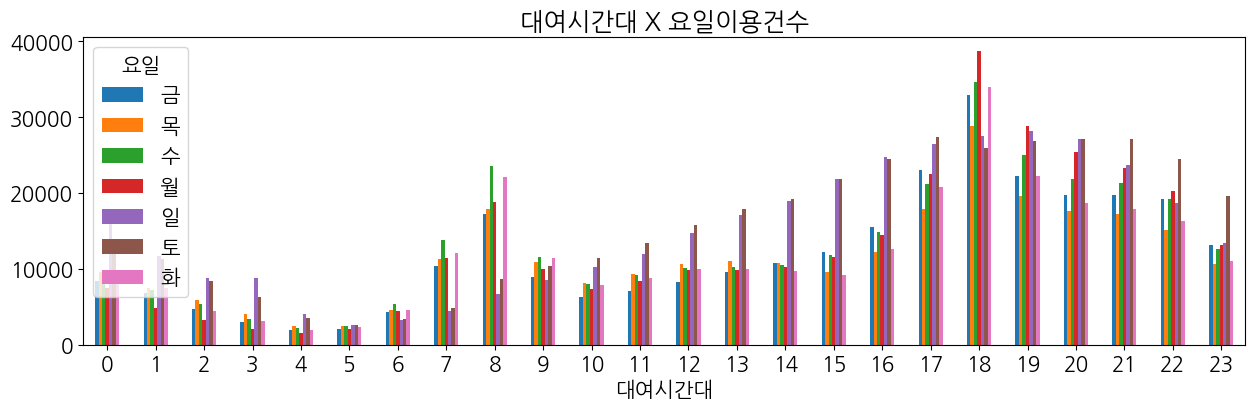

In [43]:
hourly_dayofweek_ride.plot(kind='bar', title='대여시간대 X 요일이용건수', figsize=(15,4), rot=0);

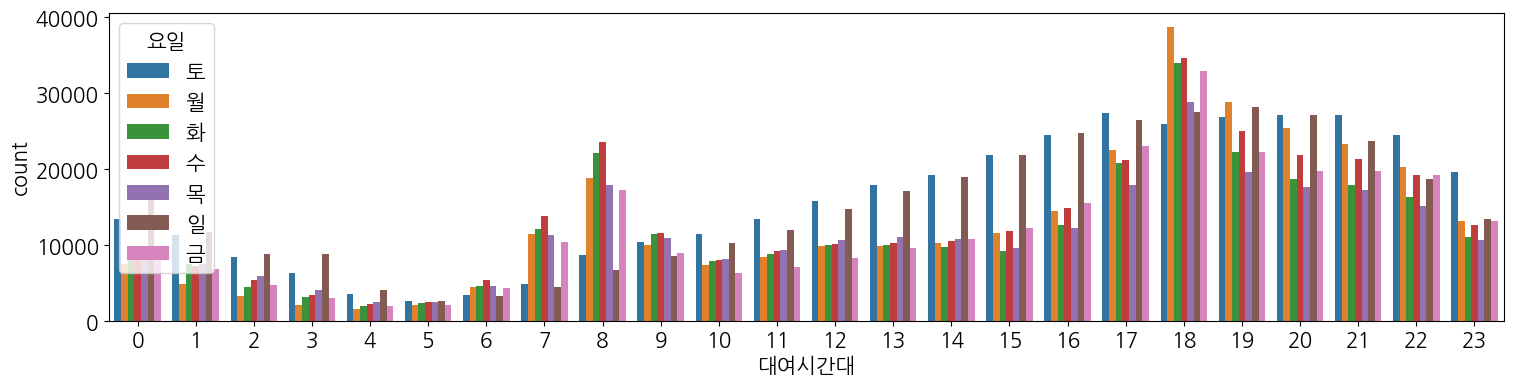

In [44]:
# countplot 으로 막대그래프

plt.figure(figsize=(18,4))
sns.countplot(x='대여시간대', hue='요일', data=bikes);

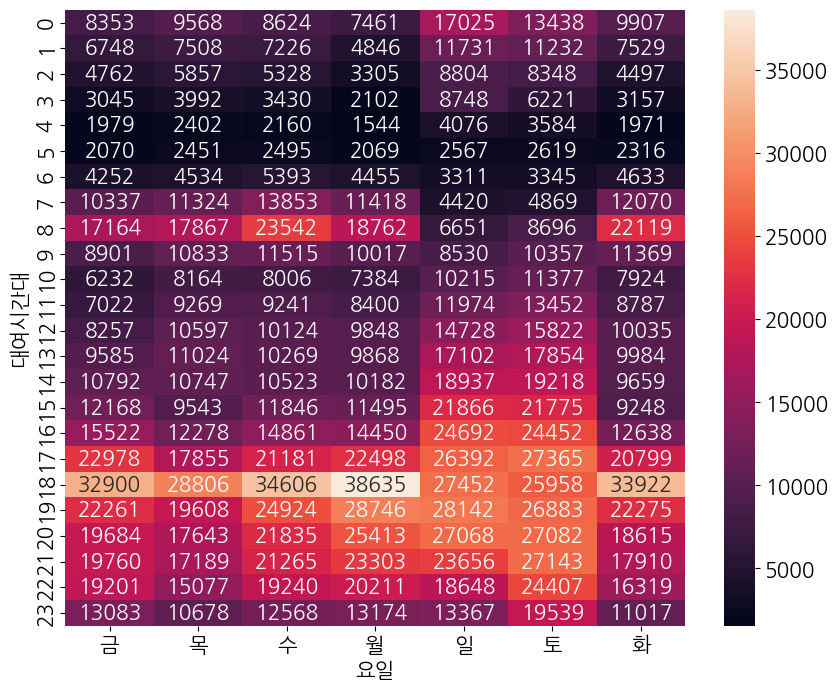

In [45]:
# 히트맵 
plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d');

In [46]:
# 주말 구분이 들어간 피봇 테이블
weekdays_hourly_ride = bikes.pivot_table(index='대여시간대', columns='주말구분', values='자전거번호', aggfunc='count')
weekdays_hourly_ride.head()

주말구분      주말     평일
대여시간대              
0      30463  43913
1      22963  33857
2      17152  23749
3      14969  15726
4       7660  10056

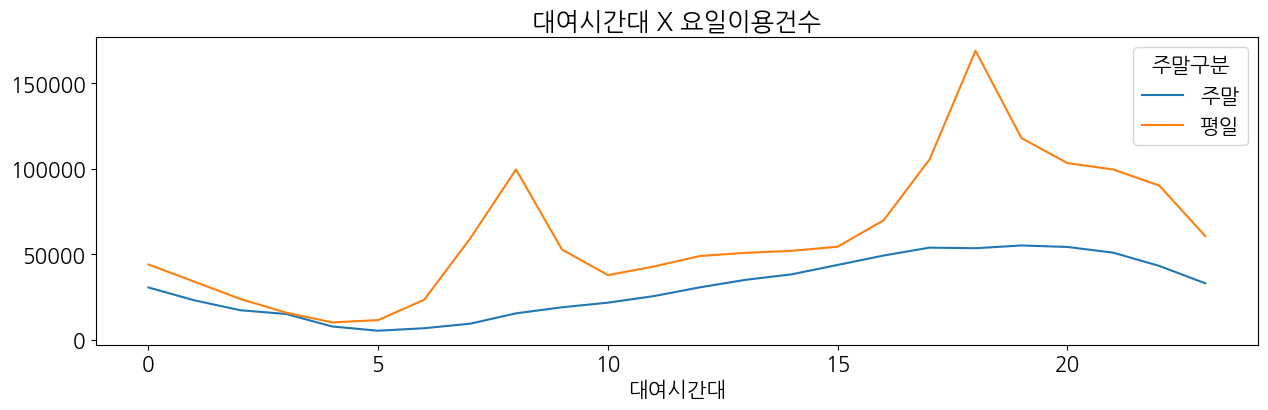

In [47]:
# 주말부분 (선)
weekdays_hourly_ride.plot(kind='line', title='대여시간대 X 요일이용건수', figsize=(15,4)); 

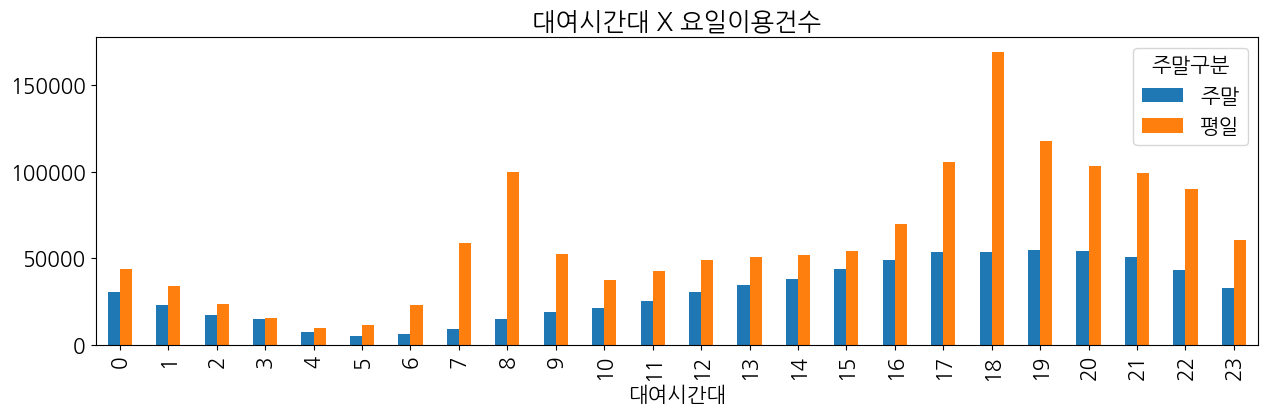

In [48]:
#주말부분 (막대)
weekdays_hourly_ride.plot(kind='bar', title='대여시간대 X 요일이용건수', figsize=(15,4));

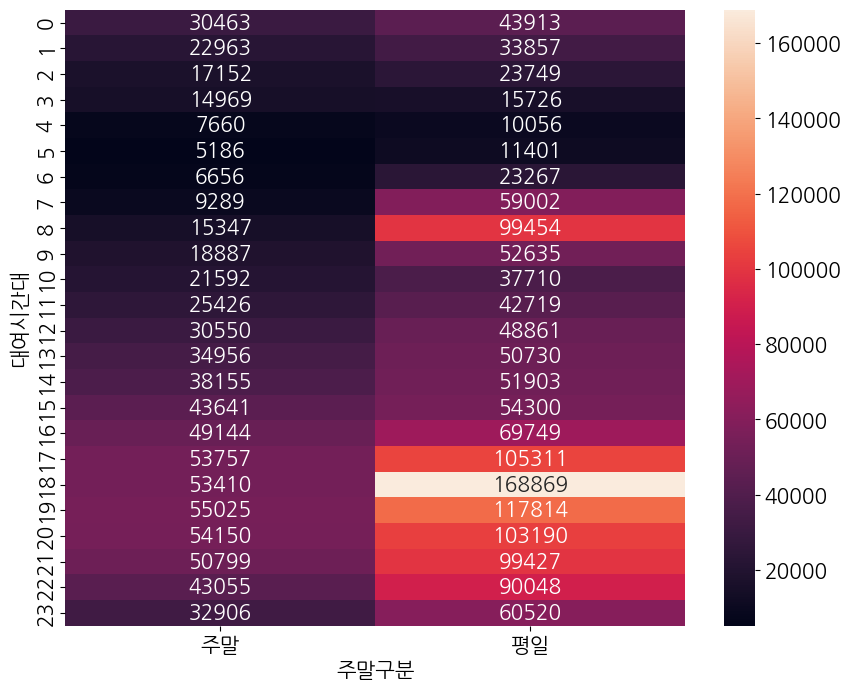

In [49]:
#주말부분 (히트맵)
plt.figure(figsize=(10,8))
sns.heatmap(data=weekdays_hourly_ride, annot=True, fmt='d');

In [50]:
# 장소에 따른 시각화

# 1단계 데이터 모델링
bikes.pivot_table(index='대여구', values='자전거번호', aggfunc='count')

자전거번호
대여구         
강남구    97081
강동구    78231
강북구    40563
강서구   141006
관악구    83382
광진구   141996
구로구    78696
금천구    33488
노원구   113823
도봉구    38697
동대문구   77505
동작구    54094
마포구   158539
서대문구   67561
서초구    97718
성동구   103806
성북구    71985
송파구   189706
양천구    64154
영등포구  179439
용산구    47993
은평구    62996
종로구    81944
중구     48533
중랑구    56413

In [51]:
구별자전거이용건수 = bikes.pivot_table(index='대여구', values='자전거번호', aggfunc='count')
구별자전거이용건수

자전거번호
대여구         
강남구    97081
강동구    78231
강북구    40563
강서구   141006
관악구    83382
광진구   141996
구로구    78696
금천구    33488
노원구   113823
도봉구    38697
동대문구   77505
동작구    54094
마포구   158539
서대문구   67561
서초구    97718
성동구   103806
성북구    71985
송파구   189706
양천구    64154
영등포구  179439
용산구    47993
은평구    62996
종로구    81944
중구     48533
중랑구    56413

In [52]:
# 오름차순
구별자전거이용건수.sort_values(by='자전거번호', ascending=True, inplace=True)
구별자전거이용건수

자전거번호
대여구         
금천구    33488
도봉구    38697
강북구    40563
용산구    47993
중구     48533
동작구    54094
중랑구    56413
은평구    62996
양천구    64154
서대문구   67561
성북구    71985
동대문구   77505
강동구    78231
구로구    78696
종로구    81944
관악구    83382
강남구    97081
서초구    97718
성동구   103806
노원구   113823
강서구   141006
광진구   141996
마포구   158539
영등포구  179439
송파구   189706

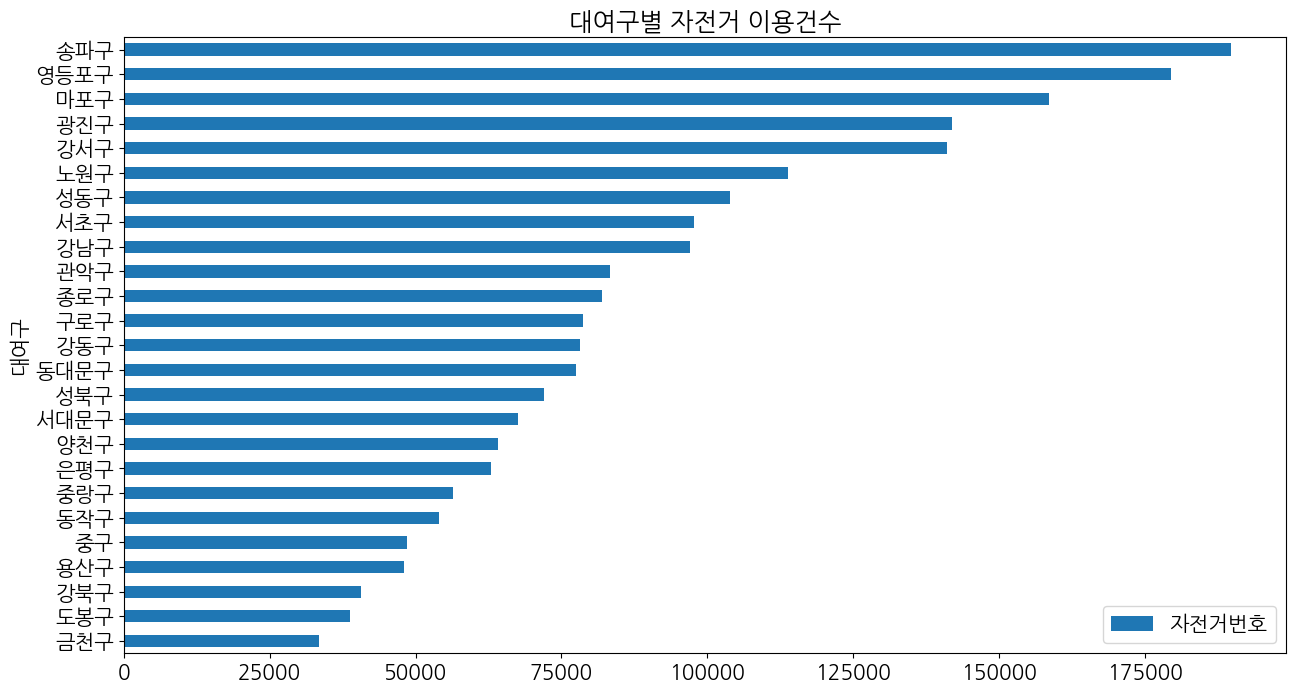

In [53]:
# bar < h 를 넣을시 가로bar 생성이 된다.
구별자전거이용건수.plot(kind='barh', title='대여구별 자전거 이용건수', figsize=(15,8));

In [54]:
구별자전거이용건수.reset_index(inplace=True)
구별자전거이용건수.head(2)

대여구  자전거번호
0  금천구  33488
1  도봉구  38697

In [55]:
# 서울시 지도 파일을 가져온다.
import json

with open('../data/seoul.json', 'r', encoding='utf-8') as f:
    서울시지도 = json.load(f)

서울시지도

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11540412678968, 37.557491025257455],
      [127.1165206546129, 37.557268061772696],
      [127.1175954493625, 37.55705301284316],
      [127.11879551821994, 37.557222485451305],
      [127.11969651045837, 37.558176474822524],
      [127.12057912633198, 37.5590144597372],
      [127.12146867175024, 37.55986003393365],
      [127.12240146859469, 37.5604208685133],
      [127.12287911525227, 37.56070873375976],
      [127.12303576608339, 37.56078573052513],
      [127.12435254630417, 37.56144246249796],
      [127.12447748580927, 37.56148569898355],
      [127.13349006006634, 37.56465664804646],
      [127.13357625665371, 37.56468978043648],
      [127.1336638698021, 37.56472375596808],
      [127.133755022522

In [56]:
bikes.head(1)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   

   대여시간대 요일 주말구분   대여구     대여점위도      대여점경도  
0      8  월   평일  동대문구 37.561867 127.064377

In [57]:
# 위도 경도 
lat = bikes['대여점위도'].mean()
lon = bikes['대여점경도'].mean()

lat, lon

(37.54734988442208, 126.99171375924)

In [58]:
center = [lat, lon]

map1 = folium.Map(location=center, zoom_start=11)
map1


In [59]:
folium.Choropleth(geo_data=서울시지도, data=구별자전거이용건수, columns=['대여구','자전거번호'], fill_color='YlGnBu', key_on='feature.properties.name').add_to(map1)
map1

In [60]:
# 대여구별 이용시간 평균

구별이용시간평균 = bikes.pivot_table(index='대여구', values='이용시간', aggfunc='mean')
구별이용시간평균

이용시간
대여구           
강남구  31.793657
강동구  25.392555
강북구  23.574736
강서구  23.142519
관악구  26.511609
광진구  24.952703
구로구  26.483316
금천구  26.403995
노원구  24.260931
도봉구  24.987803
동대문구 23.777808
동작구  31.655636
마포구  30.660153
서대문구 28.248768
서초구  32.091989
성동구  30.012167
성북구  23.170549
송파구  27.852656
양천구  25.493859
영등포구 29.465194
용산구  35.300231
은평구  25.159375
종로구  23.319499
중구   25.950322
중랑구  24.242125

In [61]:
# 오름차순으로 정렬
구별이용시간평균.sort_values(by='이용시간', ascending=True, inplace=True)
구별이용시간평균

이용시간
대여구           
강서구  23.142519
성북구  23.170549
종로구  23.319499
강북구  23.574736
동대문구 23.777808
중랑구  24.242125
노원구  24.260931
광진구  24.952703
도봉구  24.987803
은평구  25.159375
강동구  25.392555
양천구  25.493859
중구   25.950322
금천구  26.403995
구로구  26.483316
관악구  26.511609
송파구  27.852656
서대문구 28.248768
영등포구 29.465194
성동구  30.012167
마포구  30.660153
동작구  31.655636
강남구  31.793657
서초구  32.091989
용산구  35.300231

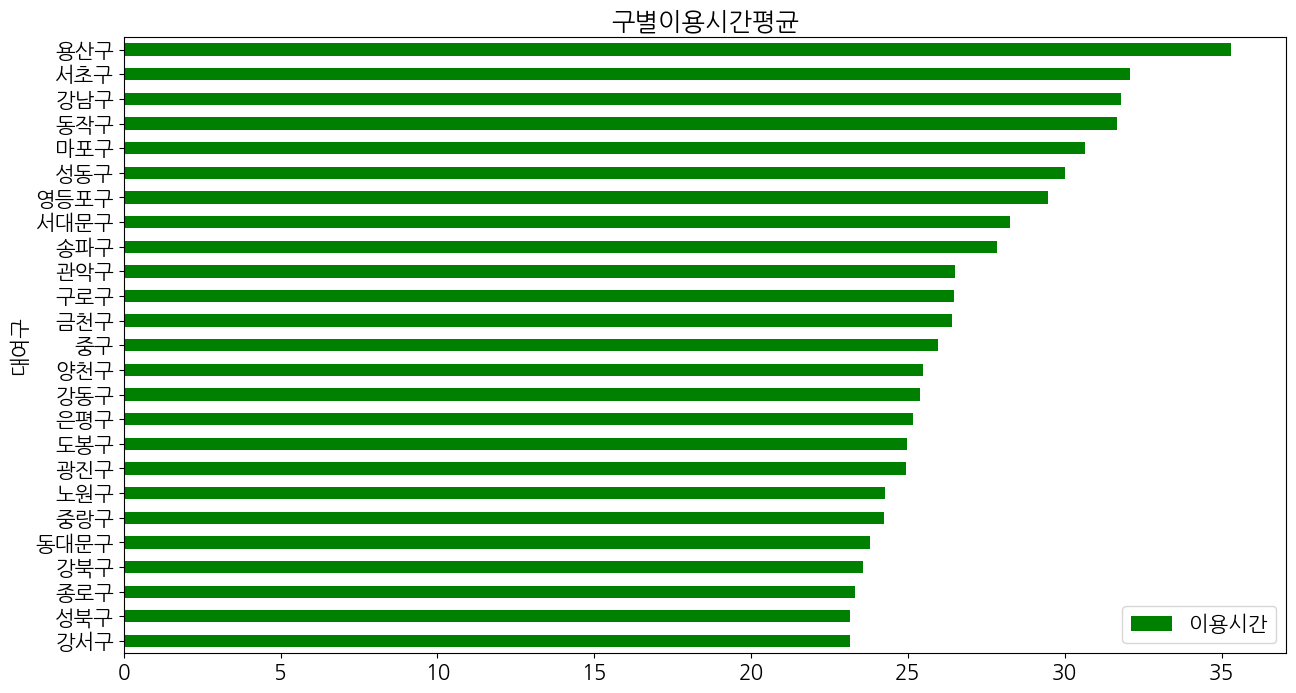

In [62]:
구별이용시간평균.plot(kind='barh', title='구별이용시간평균', figsize=(15,8), color='g');

In [63]:
# 인덱스를 리셋한다.
구별이용시간평균.reset_index(inplace=True)
구별이용시간평균

대여구      이용시간
0    강서구 23.142519
1    성북구 23.170549
2    종로구 23.319499
3    강북구 23.574736
4   동대문구 23.777808
5    중랑구 24.242125
6    노원구 24.260931
7    광진구 24.952703
8    도봉구 24.987803
9    은평구 25.159375
10   강동구 25.392555
11   양천구 25.493859
12    중구 25.950322
13   금천구 26.403995
14   구로구 26.483316
15   관악구 26.511609
16   송파구 27.852656
17  서대문구 28.248768
18  영등포구 29.465194
19   성동구 30.012167
20   마포구 30.660153
21   동작구 31.655636
22   강남구 31.793657
23   서초구 32.091989
24   용산구 35.300231

In [64]:
map2 = folium.Map(location=center, zoom_start=11)
map2

In [65]:
folium.Choropleth(geo_data=서울시지도, data=구별이용시간평균, columns=['대여구','이용시간'], fill_color='YlGnBu', key_on='feature.properties.name').add_to(map2)
map2

In [66]:
#시간적 X 장소적

daily_gu_use = bikes.pivot_table(index='일자', columns='대여구', values='자전거번호', aggfunc='count')
daily_gu_use

대여구   강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구   노원구   도봉구  ...   성동구  \
일자                                                               ...         
1    3227  2774  1460  4476  3030  5215  2604   934  4015  1366  ...  3505   
2    3071  2582  1518  4250  3198  5102  2526   916  3943  1351  ...  3628   
3    3873  2734  1398  4987  3033  5290  2879  1340  4097  1414  ...  3676   
4    3601  2820  1414  5120  3030  5213  2981  1281  4451  1441  ...  3998   
5    3303  2735  1442  5280  3036  4879  2829  1294  4341  1385  ...  3672   
6    1449  1371   743  2125  1448  2298  1282   456  2101   729  ...  1659   
7    2458  1878   899  3320  1959  3201  1870   674  2746   880  ...  2481   
8    3345  2978  1540  4712  3343  5437  2787   953  4159  1493  ...  3629   
9    2380  2194  1216  3354  2561  3772  1922   661  3134  1120  ...  2719   
10   2838  1946  1019  3751  2312  3943  2180   953  3275  1100  ...  2820   
11   3893  3044  1459  5403  2999  5152  2916  1410  4401  1462  ...  3801   
12   3685  2902  1518  5471  3075  4976  2892  1379  4378  1480  ...  3442   
13   3600  2985  1431  5278  3010  5322  2806  1214  4246  1414  ...  3401   
14   3458  2927  1523  5510  3058  5298  2964  1391  4236  1368  ...  3597   
15   2764  2592  1411  4393  2938  4492  2739   883  3676  1299  ...  2924   
16   3100  2883  1432  4700  3074  5346  2676   909  4024  1378  ...  3900   
17   3762  2824  1493  5449  2940  5119  3017  1446  4291  1515  ...  3940   
18   2003  1347   571  2813  1543  2774  1680   880  1475   491  ...  2104   
19   3668  2589  1363  5177  2718  4961  2696  1376  3797  1272  ...  3402   
20   3786  2955  1492  5730  2881  5648  2957  1457  4129  1375  ...  4069   
21   3591  2774  1280  5445  2694  4957  2797  1385  3588  1192  ...  3804   
22   3518  2855  1621  5075  3029  5441  2823  1011  4152  1442  ...  4023   
23   3086  2452  1552  4540  2958  4947  2667   906  4170  1326  ...  3760   
24   3899  2921  1500  5594  2930  5062  3032  1460  4218  1462  ...  4181   
25   3656  2929  1504  5693  3070  5152  3125  1504  4236  1496  ...  4019   
26   3499  2709  1458  5296  2698  4873  2810  1347  3985  1340  ...  3737   
27   3398  2638  1379  5132  2951  4776  2827  1306  3729  1341  ...  3745   
28   3429  2715  1324  4790  2623  4438  2531  1216  3775  1296  ...  3586   
29   2637  2426  1203  3933  2567  4087  2310   737  3383  1135  ...  3070   
30   3104  2752  1400  4209  2676  4825  2571   809  3672  1334  ...  3514   

대여구   성북구   송파구   양천구  영등포구   용산구   은평구   종로구    중구   중랑구  
일자                                                         
1    2516  7206  2229  6327  1879  2286  2688  1561  1977  
2    2444  6545  2056  6270  1883  2184  2463  1387  1807  
3    2620  6233  2186  6813  1663  2170  3090  1837  2047  
4    2728  6587  2364  6483  1543  2182  2896  1836  2082  
5    2573  6501  2278  6296  1595  2176  3120  1939  2113  
6    1360  3050  1005  2566   739  1147  1209   669  1096  
7    1733  4676  1551  4388  1148  1536  1994  1090  1218  
8    2623  7369  2372  6859  1927  2370  2573  1472  2084  
9    2088  5236  1706  4538  1316  1668  2069  1126  1514  
10   2076  5084  1577  4666  1267  1698  2325  1409  1501  
11   2680  6865  2395  6467  1753  2351  2818  1810  2104  
12   2646  6714  2350  6189  1654  2178  2859  1770  2170  
13   2596  6491  2242  5847  1541  2235  2653  1601  2045  
14   2783  6961  2438  6542  1716  2202  3074  1974  2186  
15   2280  5960  2119  5564  1526  2099  2344  1337  1820  
16   2469  6925  2279  6707  1975  2224  2612  1442  1921  
17   2531  6776  2455  7119  1938  2277  3455  2070  2084  
18   1256  3440  1164  3607   789  1067  1743  1118   855  
19   2395  6283  2252  6333  1517  2136  3426  1996  1793  
20   2763  7084  2372  6897  1822  2340  3529  2036  2111  
21   2542  6753  2322  6304  1446  2266  3281  1990  1932  
22   2649  7623  2338  6650  2055  2448  2782  1563  2072  
23   2500  6769  2282  6734  2091  2185  2599  1339  1858  
24 

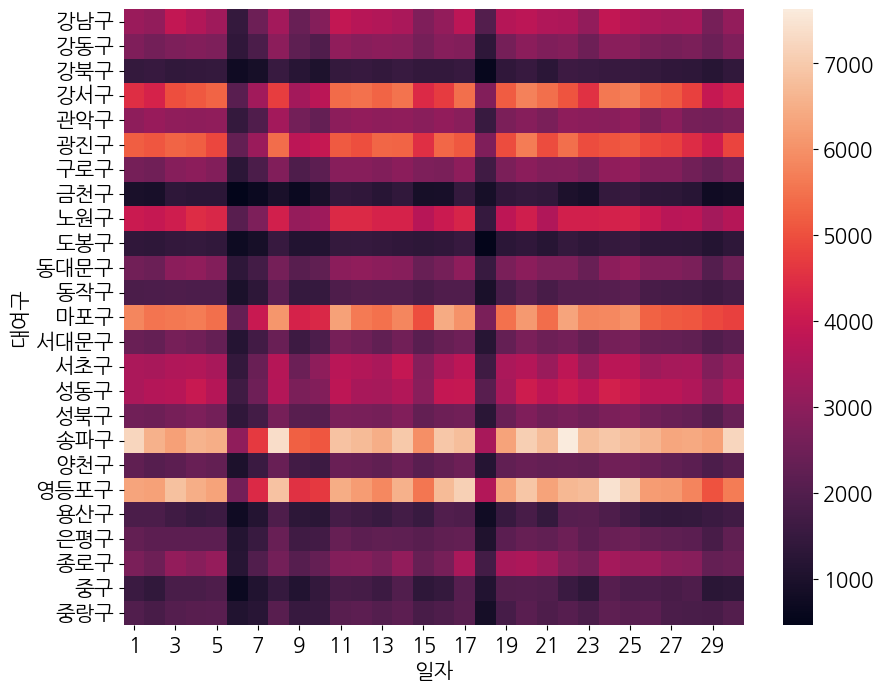

In [67]:
# 히트맵
#sns.heatmap(daily_gu_use.T); 여기의 T는 X 축과 Y축을 바꿔준다고 생각하면 된다.
plt.figure(figsize=(10,8))
sns.heatmap(daily_gu_use.T);

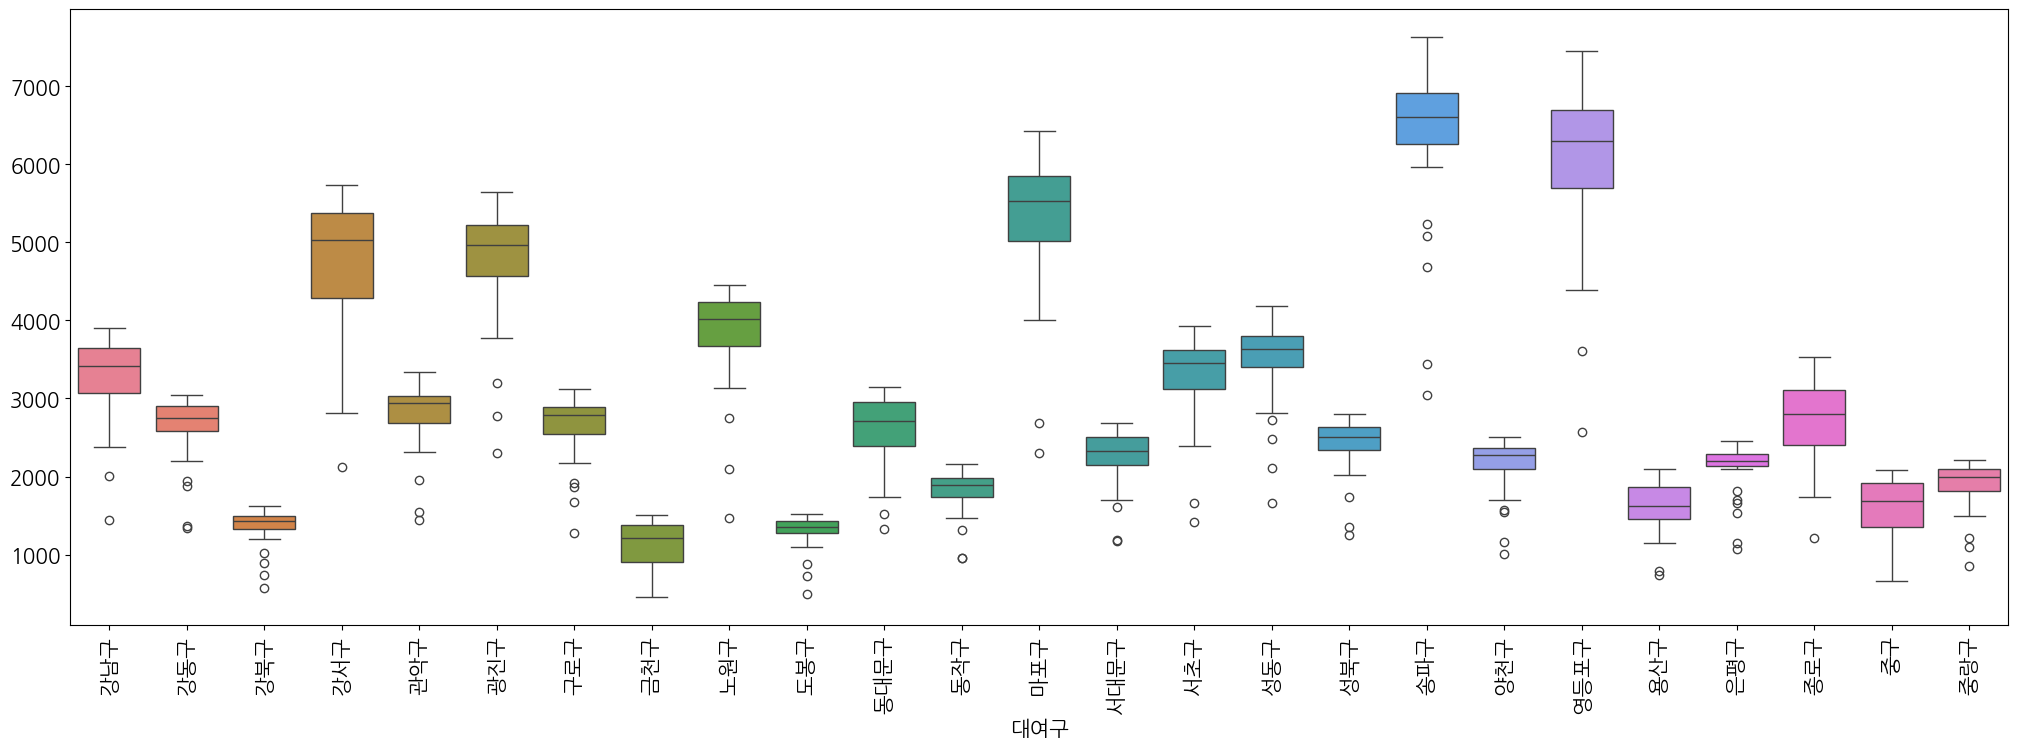

In [68]:
# 박스 그래프
plt.figure(figsize=(25,8))
sns.boxplot(data=daily_gu_use);
plt.xticks(rotation=90);

In [69]:
# 대여시간대 x 이용건수
hourly_gu_use = bikes.pivot_table(index='대여시간대',columns='대여구', values='자전거번호', aggfunc='count')
hourly_gu_use

대여구      강남구   강동구   강북구    강서구   관악구    광진구   구로구   금천구   노원구   도봉구  ...  \
대여시간대                                                                 ...   
0       2643  3230  2066   4459  3769   5314  2650   790  4855  1529  ...   
1       2660  2342  1706   3306  2830   3621  1797   650  3632  1297  ...   
2       2360  1852  1378   2442  1899   2469  1291   496  2610   853  ...   
3       1689  1398   932   1909  1550   1830   853   328  1932   668  ...   
4        920   620   595   1152   990    998   572   173  1052   403  ...   
5        648   686   392   1072   745    992   543   161   829   416  ...   
6       1316  1173   499   2144  1042   1687  1081   511  1413   498  ...   
7       2404  2420  1047   4854  2800   3512  3091  1623  2841  1120  ...   
8       4951  3728  1533   9357  4350   6988  4691  3337  4491  1541  ...   
9       3202  2413  1160   4766  2414   4939  2550  1350  3259  1189  ...   
10      2376  2247  1078   3722  2037   4208  2071   678  3176  1027  ...   
11      2733  2227  1178   4183  2205   4280  2163   906  3479  1122  ...   
12      3458  2709  1360   4900  2635   5006  2568   993  4103  1433  ...   
13      3749  3037  1505   5229  2865   5591  2945  1055  4523  1465  ...   
14      3948  3103  1572   5474  2960   6153  2803  1064  4975  1496  ...   
15      4448  3469  1656   5579  3114   6420  3286  1218  5335  1599  ...   
16      5468  3943  2037   6843  3925   7649  4252  1425  6307  1972  ...   
17      8318  5046  2418   9718  4995   9721  5770  2660  7844  2654  ...   
18     12630  6298  3119  14674  6710  11912  9131  5093  9118  3373  ...   
19      7688  5946  2791  11199  6365  11413  6432  2702  8304  2853  ...   
20      6161  5638  2730  10342  6350  10239  5538  2048  8144  2747  ...   
21      5608  5509  2902   9737  6370  10491  5247  1890  8006  2952  ...   
22      4544  5147  2728   8248  5861   9539  4319  1441  7873  2617  ...   
23      3159  4050  2181   5697  4601   7024  3052   896  5722  1873  ...   

대여구      성동구   성북구    송파구   양천구   영등포구   용산구   은평구   종로구    중구   중랑구  
대여시간대                                                                 
0       3003  3165   6014  2091   4892  1641  2389  1697  1180  2369  
1       2096  2501   5150  1770   3314  1334  1873  1299   893  1944  
2       1394  1941   3339  1143   2190   935  1330   978   683  1413  
3       1103  1337   2390   859   1627   755   977   749   564  1171  
4        743   701   1252   479   1109   512   508   552   407   580  
5        698   522   1086   565   1140   305   527   741   442   597  
6       1092  1089   2326   988   2682   541  1025  1079   538   826  
7       2588  2297   5214  2674   6516  1094  2430  2664  1259  2128  
8       5446  3763   9105  3886   9939  1866  3420  4317  2262  3061  
9       3451  2441   5552  2205   5239  1199  2321  3203  1658  1608  
10      2738  2191   4683  1728   4241  1019  1899  2645  1554  1461  
11      3200  2278   5216  1973   6276  1377  1979  3670  2087  1632  
12      3838  2467   6410  2285   6713  1481  2507  4030  2264  1897  
13      4038  2743   7053  2354   6807  1601  2510  4401  2492  2059  
14      4604  2783   7819  2449   7264  1798  2419  4370  2592  2022  
15      5061  3127   8400  2702   7826  2413  2731  4547  2872  2247  
16      5844  3771  10168  3420  10135  2773  3072  5396  3084  2689  
17      8394  4448  13010  4050  15548  3498  4016  7180  4346  3577  
18     12116  5291  19711  6120  21577  5363  5134  8944  5851  4372  
19      8338  4936  16201  4621  13860  4138  4552  5452  3269  4146  
20      7322  4884  14966  4484  12740  3723  4402  4452  2603  4027  
21      6831  4964  14016  4252  11559  3601  4140  4008  2371  3932  
22      5929  4594  12391  4351   9773  3059  3899  3322  1908  3828  
23      3939  3751   8234  2705   6472  1967  2936  2248  1354  2827  

[24 rows x 25 columns]

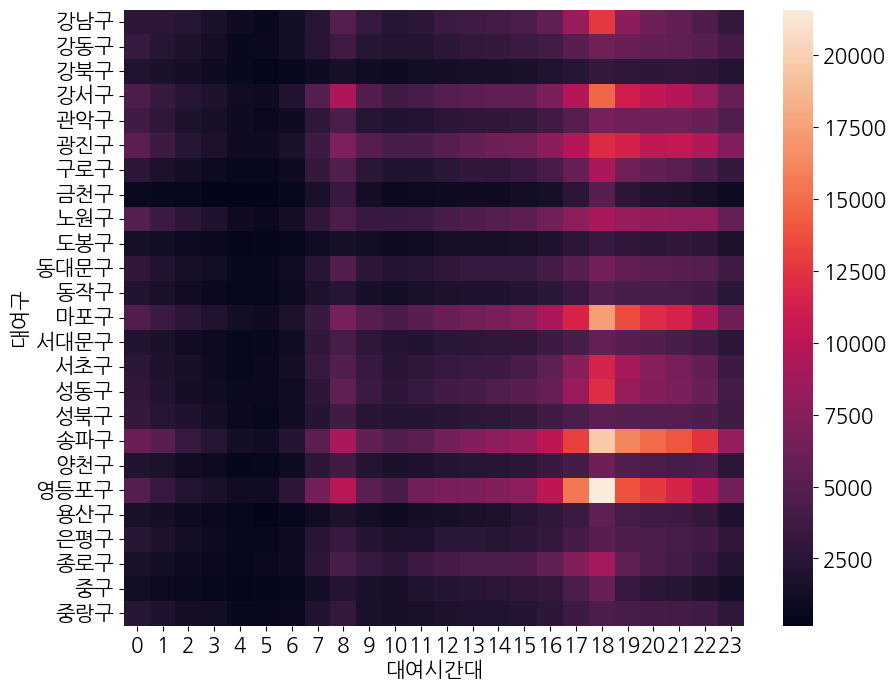

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_gu_use.T);

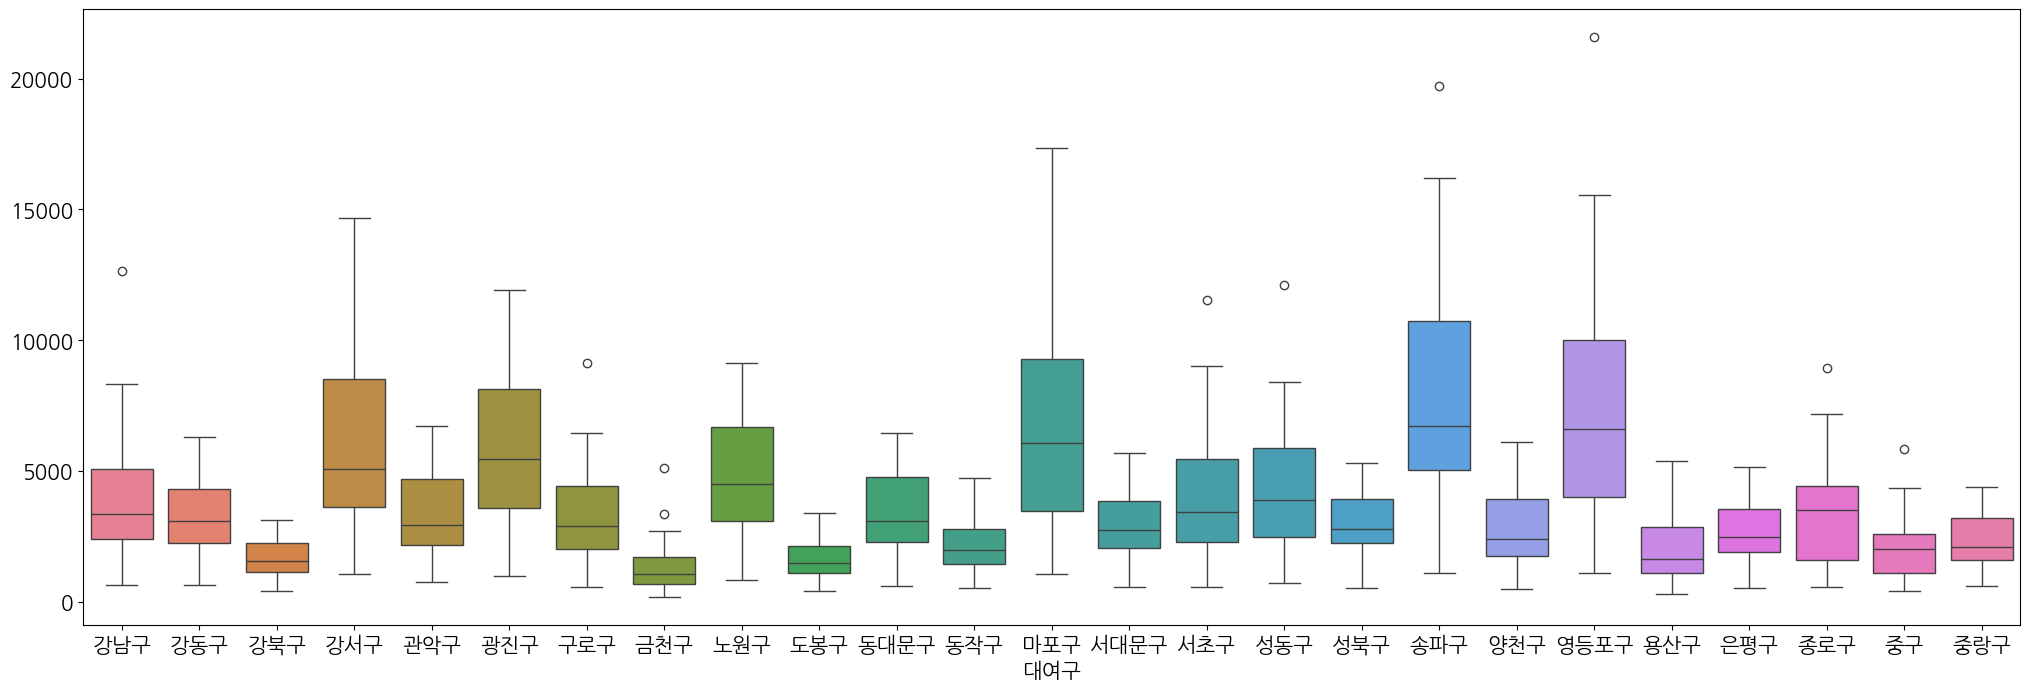

In [71]:
plt.figure(figsize=(25,8))
sns.boxplot(data=hourly_gu_use);

In [72]:
bikes.head(1)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   

   대여시간대 요일 주말구분   대여구     대여점위도      대여점경도  
0      8  월   평일  동대문구 37.561867 127.064377

In [73]:
bikes.pivot_table(index=['대여 대여소명','대여점위도','대여점경도'], columns='주말구분', values='자전거번호', aggfunc='count')

주말구분                                    주말    평일
대여 대여소명         대여점위도     대여점경도                 
(구)신한은행 중랑교지점   37.598591 127.079819   391   832
(구)합정동 주민센터     37.549561 126.905754   357   715
3호선 매봉역 3번출구앞   37.486767 127.046761   443  1049
419민주묘지역        37.649673 127.013451   547   946
8삼호@ 2동 ( 간선도로) 37.493759 127.045898   111   316
...                                    ...   ...
휘봉고등학교 앞        37.586815 127.067543   193   370
흑석역 1번출구        37.509380 126.963615  1297  2195
흑석역 4번출구        37.509056 126.963249   184   412
흑석한강푸르지오 106동앞  37.505356 126.966179    67   168
희성오피앙           37.680313 127.055069   245   418

[1524 rows x 2 columns]

In [74]:
rent_bikes = bikes.pivot_table(index=['대여 대여소명','대여점위도','대여점경도'], columns='주말구분', values='자전거번호', aggfunc='count')
rent_bikes.head(5)

주말구분                                   주말    평일
대여 대여소명         대여점위도     대여점경도                
(구)신한은행 중랑교지점   37.598591 127.079819  391   832
(구)합정동 주민센터     37.549561 126.905754  357   715
3호선 매봉역 3번출구앞   37.486767 127.046761  443  1049
419민주묘지역        37.649673 127.013451  547   946
8삼호@ 2동 ( 간선도로) 37.493759 127.045898  111   316

In [75]:
rent_bikes.nlargest(50,'주말')['주말']

대여 대여소명                  대여점위도      대여점경도     
뚝섬유원지역 1번출구 앞            37.531860  127.067192    5777
여의나루역 1번출구 앞             37.526989  126.932098    5286
고속터미널역 8-1번, 8-2번 출구 사이  37.506199  127.003944    3932
봉림교 교통섬                  37.484230  126.926392    3699
롯데월드타워(잠실역2번출구 쪽)        37.513126  127.100960    3231
마포구민체육센터 앞               37.556610  126.898018    3229
건대입구역 사거리(롯데백화점)         37.539139  127.070618    3169
홍대입구역 2번출구 앞             37.557499  126.923805    2922
잠실새내역 5번 출구 뒤            37.511982  127.085052    2632
당산육갑문                    37.535339  126.903679    2327
신도림역 1번 출구 앞             37.509720  126.890099    2304
IFC몰                     37.526066  126.925537    2240
합정역 7번출구 앞               37.548645  126.912827    2194
동방1교                     37.471828  126.933922    2170
서울숲 관리사무소                37.542816  127.042084    2141
안암로터리 버스정류장 앞            37.582592  127.028976    2058
올림픽공원역 3번출구              37.516258  127.130592    2011
CJ 드림시티           

In [76]:
주말대여점50 = rent_bikes.nlargest(50,'주말')['주말'].reset_index()
주말대여점50

대여 대여소명     대여점위도      대여점경도    주말
0             뚝섬유원지역 1번출구 앞 37.531860 127.067192  5777
1              여의나루역 1번출구 앞 37.526989 126.932098  5286
2   고속터미널역 8-1번, 8-2번 출구 사이 37.506199 127.003944  3932
3                   봉림교 교통섬 37.484230 126.926392  3699
4         롯데월드타워(잠실역2번출구 쪽) 37.513126 127.100960  3231
5                마포구민체육센터 앞 37.556610 126.898018  3229
6          건대입구역 사거리(롯데백화점) 37.539139 127.070618  3169
7              홍대입구역 2번출구 앞 37.557499 126.923805  2922
8             잠실새내역 5번 출구 뒤 37.511982 127.085052  2632
9                     당산육갑문 37.535339 126.903679  2327
10             신도림역 1번 출구 앞 37.509720 126.890099  2304
11                     IFC몰 37.526066 126.925537  2240
12               합정역 7번출구 앞 37.548645 126.912827  2194
13                     동방1교 37.471828 126.933922  2170
14                서울숲 관리사무소 37.542816 127.042084  2141
15            안암로터리 버스정류장 앞 37.582592 127.028976  2058
16              올림픽공원역 3번출구 37.516258 127.130592  2011
17                  CJ 드림시티 37.599491 126.916862  2002
18              당산역 10번출구 앞 37.533688 126.902107  1978
19                 노들역 1번출구 37.512959 126.952072  1905
20               신대방역 2번 출구 37.487129 126.913017  1897
21                 옥수역 3번출구 37.541363 127.017662  1875
22             몽촌토성역 1번출구 옆 37.517288 127.114197  1874
23               청계천 생태교실 앞 37.567970 127.046890  1871
24                 가양역 8번출구 37.561035 126.854813  1860
25              양천향교역 7번출구앞 37.567680 126.840897  1765
26                 잠실역 8번출구 37.513962 127.100304  1746
27        발산역 1번, 9번 인근 대여소 37.558910 126.838097  1733
28            마곡나루역 5번출구 뒤편 37.565201 126.827316  1700
29          잠실나루역 (2번 출구 쪽) 37.520451 127.104202  1700
30               현대고등학교 건너편 37.524071 127.021790  1672
31                   커먼그라운드 37.545040 127.089958  1671
32           천호역4번출구(현대백화점) 37.538658 127.124214  1655
33              오목교역 7번출구 앞 37.524063 126.875580  1652
34           자양사거리 광진아크로텔 앞 37.537010 127.082245  1637
35           월드컵경기장역 3번출구 옆 37.570721 126.898979  1621
36               신도림테크노근린공원 37.508194 126.891304  1619
37                    월드컵공원 37.563965 126.898209  1606
38              한성백제역 2번 출구 37.516659 127.116257  1597
39                  초원아파트 앞 37.531055 126.924210  1543
40          한신16차아파트 119동 앞 37.516598 127.009590  1534
41             건대입구역 5번출구 뒤 37.540138 127.069283  1522
42            센트럴 푸르지오 시티 앞 37.518211 126.902229  1515
43                    잠실나들목 37.516781 127.090492  1508
44                   홈플러스 앞 37.568420 126.899429  1496
45             홍대입구역 8번출구 앞 37.557060 126.924423  1494
46              뚝섬역 1번 출구 옆 37.548561 127.045006  1486
47                    방이삼거리 37.512104 127.107780  1482
48          영등포역지하쇼핑센타 5번출구 37.516651 126.907990  1479
49                    당곡사거리 37.489750 126.927467  1478

In [77]:
rent_bikes.nlargest(50,'평일')['평일'].reset_index()
평일대여점50 = rent_bikes.nlargest(50,'평일')['평일'].reset_index()
평일대여점50

대여 대여소명     대여점위도      대여점경도    평일
0             뚝섬유원지역 1번출구 앞 37.531860 127.067192  6840
1              여의나루역 1번출구 앞 37.526989 126.932098  6241
2                   봉림교 교통섬 37.484230 126.926392  5986
3              홍대입구역 2번출구 앞 37.557499 126.923805  5617
4         롯데월드타워(잠실역2번출구 쪽) 37.513126 127.100960  5383
5             마곡나루역 5번출구 뒤편 37.565201 126.827316  4648
6          건대입구역 사거리(롯데백화점) 37.539139 127.070618  4573
7   고속터미널역 8-1번, 8-2번 출구 사이 37.506199 127.003944  4556
8               양천향교역 7번출구앞 37.567680 126.840897  4342
9             안암로터리 버스정류장 앞 37.582592 127.028976  4127
10             신도림역 1번 출구 앞 37.509720 126.890099  3959
11                     동방1교 37.471828 126.933922  3925
12               마포구민체육센터 앞 37.556610 126.898018  3893
13            건국대학교 (입학정보관) 37.540089 127.073746  3679
14            잠실새내역 5번 출구 뒤 37.511982 127.085052  3660
15        발산역 1번, 9번 인근 대여소 37.558910 126.838097  3639
16               신대방역 2번 출구 37.487129 126.913017  3613
17               구로디지털단지역 앞 37.484940 126.901321  3587
18                 가양역 8번출구 37.561035 126.854813  3561
19              당산역 10번출구 앞 37.533688 126.902107  3357
20                  CJ 드림시티 37.599491 126.916862  3325
21           자양사거리 광진아크로텔 앞 37.537010 127.082245  3243
22                     IFC몰 37.526066 126.925537  3228
23          잠실나루역 (2번 출구 쪽) 37.520451 127.104202  3105
24              오목교역 7번출구 앞 37.524063 126.875580  3014
25                    당산육갑문 37.535339 126.903679  3005
26                    당곡사거리 37.489750 126.927467  2991
27                 노들역 1번출구 37.512959 126.952072  2979
28                상계역(4번출구) 37.660000 127.072968  2951
29               송파역 2번 출구앞 37.499413 127.112869  2929
30                군자역 7번출구뒤 37.556862 127.079140  2896
31                   커먼그라운드 37.545040 127.089958  2884
32               건국대학교 학생회관 37.541763 127.078430  2879
33               청계천 생태교실 앞 37.567970 127.046890  2869
34              영등포구청역 1번출구 37.524635 126.896217  2865
35               합정역 7번출구 앞 37.548645 126.912827  2859
36                 석촌역 2번출구 37.505932 127.107750  2847
37                 옥수역 3번출구 37.541363 127.017662  2833
38                 잠실역 8번출구 37.513962 127.100304  2817
39               망원역 1번출구 앞 37.556000 126.910454  2803
40              공릉역 1번 출구 앞 37.626614 127.072754  2772
41          영등포역지하쇼핑센타 5번출구 37.516651 126.907990  2767
42               둔촌역 3번 출입구 37.526695 127.135529  2754
43           천호역4번출구(현대백화점) 37.538658 127.124214  2720
44             송파나루역 4번 출구옆 37.509979 127.112312  2695
45                   마포구청 앞 37.565903 126.901184  2680
46                 세종사이버대학교 37.553417 127.073196  2674
47           어린이대공원역 3번출구 앞 37.547070 127.074272  2666
48               신도림테크노근린공원 37.508194 126.891304  2646
49              올림픽공원역 3번출구 37.516258 127.130592  2642

In [78]:
#top 50 지도의 가운데 지점을 중심으로 초기 map 그리기

lat = 주말대여점50['대여점위도'].mean()
lon = 주말대여점50['대여점경도'].mean()

center1 = [lat, lon]

map3 = folium.Map(location=center1, zoom_start=12)
map3

In [79]:
주말대여점50.head(1)

대여 대여소명     대여점위도      대여점경도    주말
0  뚝섬유원지역 1번출구 앞 37.531860 127.067192  5777

In [81]:
# 50개 주말 대여점을 지도에 표기한다.

for i in 주말대여점50.index:
    
    sub_lat = 주말대여점50.loc[i,'대여점위도']
    sub_lon = 주말대여점50.loc[i,'대여점경도']
    대여점위치 = [sub_lat, sub_lon]
    대여점명 = 주말대여점50.loc[i,'대여 대여소명']

    folium.Marker(location=대여점위치, popup=대여점명).add_to(map3)
map3

In [83]:
for i in 평일대여점50.index:
    
    sub_lat = 평일대여점50.loc[i,'대여점위도']
    sub_lon = 평일대여점50.loc[i,'대여점경도']
    대여점위치 = [sub_lat, sub_lon]
    대여점명 = 평일대여점50.loc[i,'대여 대여소명']

    folium.Marker(location=대여점위치, popup=대여점명,icon=folium.Icon(color='red', icon='star')).add_to(map3)
map3